In [19]:
x = [10, 20, 30, 40, 50]
for item in x:
    print ('Item is', item)

Item is 10
Item is 20
Item is 30
Item is 40
Item is 50


In [20]:
import IPython
print ('IPython version:      %6.6s (need at least 1.0)', IPython.__version__)



IPython version:      %6.6s (need at least 1.0) 7.5.0


Text(0, 0.5, 'Y axis')

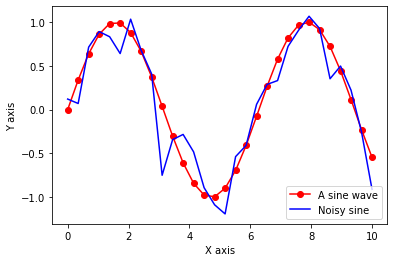

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'ro-', label='A sine wave')
plt.plot(x, z, 'b-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [22]:
print('Make a 3 row x 4 column array of random numbers')
x = np.random.random((3, 4))
print(x)

Make a 3 row x 4 column array of random numbers
[[0.35620151 0.41889917 0.74789513 0.56964173]
 [0.85971071 0.83637173 0.70192523 0.84429351]
 [0.92307903 0.95559776 0.18735012 0.13662612]]


In [23]:
# The colon syntax is called "slicing" the array. 
print('Get the first row')
print(x[0,:])


Get the first row
[0.35620151 0.41889917 0.74789513 0.56964173]


In [24]:
x.max()

0.9555977565185253

In [25]:
x.min()

0.13662611972907923

In [26]:
x.mean()

0.6281326454741379

In [27]:
print(x.max(axis=1))

[0.74789513 0.85971071 0.95559776]


In [29]:
heads=[]

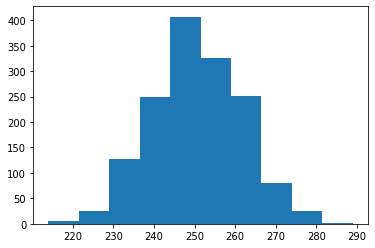

In [33]:
for i in range (500):
    heads.append(np.random.binomial(500,0.5))
hist = plt.hist(heads)